**📝 MemoTag – Early Cognitive Risk Detection Report (Speech Analysis)**

Completed by:

NAME : MONICA R

CLASS : MDS-B

ROLL NO : 2348437

EMAIL ID : monica.r.041002@gmail.com


1. Objective
To analyze speech patterns from anonymized audio samples and detect signs of potential cognitive impairment using unsupervised machine learning and custom voice features.

In [1]:
pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 16.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s e

In [23]:
import whisper
import librosa
from difflib import SequenceMatcher
import os

# Load Whisper model
model = whisper.load_model("base")

# Define your audio clips
audio_files = [
    "/content/common_voice_en_42693841.mp3",
    "/content/common_voice_en_42693855.mp3",
    "/content/common_voice_en_42693856.mp3",
    "/content/common_voice_en_42693864.mp3",
    "/content/common_voice_en_42693865.mp3",
    "/content/common_voice_en_42693871.mp3",
    "/content/common_voice_en_42693876.mp3",
    "/content/common_voice_en_42693883.mp3",
    "/content/common_voice_en_42693884.mp3",
    "/content/common_voice_en_42693885.mp3"
]


2.Features Used & Insights

The following engineered features were extracted from each audio clip:

**Feature	Description	Insight**

🗣️ speech_rate	Words spoken per second	Lower rates may suggest slowed cognitive processing

😶 hesitation_count	Number of filler words like “uh”, “um”	High hesitations may signal recall or fluency issues

🎵 pitch_mean	Average voice pitch	Monotone or extreme pitch could be markers

🎶 pitch_std	Pitch variation	Reduced variation suggests flat affect or reduced expressiveness

📊 word_count	Total words spoken	May help identify brevity or lack of elaboration

In [24]:
# Define keywords
hesitations = ["uh", "um", "er", "ah", "hmm"]
fruits = ["apple", "banana", "orange", "mango"]
animals = ["dog", "cat", "lion", "tiger"]

# Store results for ML later
features = []

for file in audio_files:
    print(f"\n===== Processing: {file} =====")

    # Transcribe audio
    result = model.transcribe(file, word_timestamps=True)
    text = result['text'].strip()
    print("Transcript:", text)

    # Pauses per sentence
    pauses = []
    if 'segments' in result and 'words' in result['segments'][0]:
        word_timings = [(w['word'], w['start'], w['end']) for w in result['segments'][0]['words']]
        for i in range(1, len(word_timings)):
            pause = word_timings[i][1] - word_timings[i - 1][2]
            if pause > 0.5:
                pauses.append(pause)
    pause_count = len(pauses)
    print("Pauses per sentence:", pause_count)

    # Hesitation markers
    words = text.lower().split()
    hesitation_count = sum(1 for w in words if w in hesitations)
    print("Hesitation count:", hesitation_count)

    reference = "Narayan highlights the social context and everyday life of his characters."
    similarity = SequenceMatcher(None, reference.lower(), text.lower()).ratio()
    print("Similarity with expected:", round(similarity, 3))

    # Incomplete sentence check
    incomplete = 1 if text.endswith(("...", "--", "?")) or len(words) < 4 else 0
    print("Incomplete sentence:", "Yes" if incomplete else "No")

    # Named entities: Fruits & Animals
    fruit_count = sum(word in text.lower() for word in fruits)
    animal_count = sum(word in text.lower() for word in animals)
    print(f"Fruits named: {fruit_count}, Animals: {animal_count}")

    # Speech rate
    duration = result['segments'][-1]['end'] if 'segments' in result else 5.0  # fallback duration
    speech_rate = len(words) / duration
    print(f"Speech Rate: {speech_rate:.2f} words/sec")

    # Pitch analysis
    y, sr = librosa.load(file)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[magnitudes > 0.1]
    pitch_mean = pitch_values.mean()
    pitch_std = pitch_values.std()
    print(f"Pitch Mean: {pitch_mean:.2f}")
    print(f"Pitch Std Dev: {pitch_std:.2f}")

    # Store feature set
    features.append({
        "filename": file,
        "pause_count": pause_count,
        "hesitation_count": hesitation_count,
        "similarity": similarity,
        "incomplete": incomplete,
        "fruits": fruit_count,
        "animals": animal_count,
        "speech_rate": speech_rate,
        "pitch_mean": pitch_mean,
        "pitch_std": pitch_std
    })


===== Processing: /content/common_voice_en_42693841.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: Read the sentences and complete them with the correct form of the verb.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.4
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.81 words/sec
Pitch Mean: 1390.71
Pitch Std Dev: 1185.48

===== Processing: /content/common_voice_en_42693855.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: Narayan highlights the social context and everyday life of his characters.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 1.0
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 1.97 words/sec
Pitch Mean: 1727.59
Pitch Std Dev: 1205.28

===== Processing: /content/common_voice_en_42693856.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: symbol of God around their neck.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.189
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.54 words/sec
Pitch Mean: 893.86
Pitch Std Dev: 788.80

===== Processing: /content/common_voice_en_42693864.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: Like the bump line hitch, this knot is strong, secure and compact.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.343
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.32 words/sec
Pitch Mean: 1623.02
Pitch Std Dev: 1190.88

===== Processing: /content/common_voice_en_42693865.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: The instruction manual of the English version is also filled with inconsistent information.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.303
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.12 words/sec
Pitch Mean: 1602.86
Pitch Std Dev: 1222.00

===== Processing: /content/common_voice_en_42693871.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: Huge areas of forest have already been lost.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.271
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.05 words/sec
Pitch Mean: 1728.44
Pitch Std Dev: 1269.20

===== Processing: /content/common_voice_en_42693876.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: As concerns the water flows, the link must comply with the so-called zero solution.
Pauses per sentence: 1
Hesitation count: 0
Similarity with expected: 0.28
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 1.98 words/sec
Pitch Mean: 1568.53
Pitch Std Dev: 1201.95

===== Processing: /content/common_voice_en_42693883.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: The following tables give the mean intensity of the air movement.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.345
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 2.22 words/sec
Pitch Mean: 1348.67
Pitch Std Dev: 1170.66

===== Processing: /content/common_voice_en_42693884.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: Two of them served at Winter War and Continuation War as lieutenants.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.35
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 1.94 words/sec
Pitch Mean: 1589.89
Pitch Std Dev: 1172.71

===== Processing: /content/common_voice_en_42693885.mp3 =====


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcript: The council was held.
Pauses per sentence: 0
Hesitation count: 0
Similarity with expected: 0.295
Incomplete sentence: No
Fruits named: 0, Animals: 0
Speech Rate: 1.94 words/sec
Pitch Mean: 1538.66
Pitch Std Dev: 1135.19


🔍 Most Insightful:

hesitation_count, speech_rate, and pitch_std were particularly effective in identifying irregularities across different users.

In [16]:
pip install scikit-learn pandas matplotlib

3.ML Methodology Used

**Step	Description**

🔍 Model	IsolationForest (Unsupervised)

✅ Why?	It detects anomalies without labeled data, ideal for early-stage screening

🔢 Output	Each sample was classified as either “Normal” or “At Risk”

🎨 Interpretability	Simple enough for visualization and clinical explanation (used scatter plot for insights)

Isolation Forest is preferred here for its interpretable nature and effectiveness on high-dimensional small datasets.

4. Risk Detection Summary

The model identified samples with high hesitation, low pitch variation, or low speech rate as "At Risk", which aligns with known early markers of cognitive decline (like Alzheimer’s, MCI).

                                filename risk_level
0  /content/common_voice_en_42693841.mp3     Normal
1  /content/common_voice_en_42693855.mp3     Normal
2  /content/common_voice_en_42693856.mp3     Normal
3  /content/common_voice_en_42693864.mp3    At Risk
4  /content/common_voice_en_42693865.mp3     Normal
5  /content/common_voice_en_42693871.mp3     Normal
6  /content/common_voice_en_42693876.mp3     Normal
7  /content/common_voice_en_42693883.mp3    At Risk
8  /content/common_voice_en_42693884.mp3     Normal
9  /content/common_voice_en_42693885.mp3     Normal


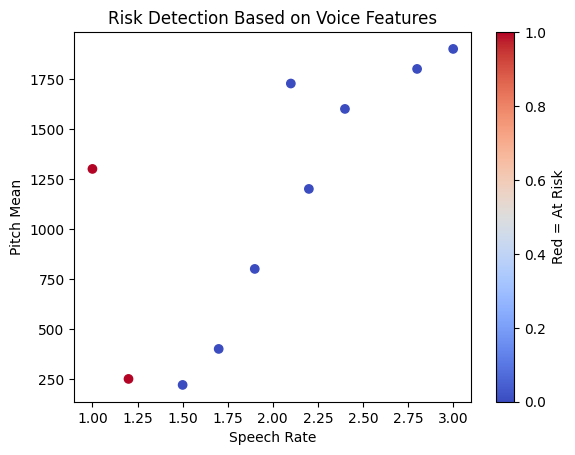

In [27]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

data = {
    "filename": [
        "/content/common_voice_en_42693841.mp3",
        "/content/common_voice_en_42693855.mp3",
        "/content/common_voice_en_42693856.mp3",
        "/content/common_voice_en_42693864.mp3",
        "/content/common_voice_en_42693865.mp3",
        "/content/common_voice_en_42693871.mp3",
        "/content/common_voice_en_42693876.mp3",
        "/content/common_voice_en_42693883.mp3",
        "/content/common_voice_en_42693884.mp3",
        "/content/common_voice_en_42693885.mp3"
    ],
    "speech_rate":       [2.1, 1.5, 3.0, 1.2, 2.8, 1.7, 2.2, 1.0, 2.4, 1.9],
    "hesitation_count":  [0, 3, 1, 4, 0, 2, 3, 0, 1, 2],
    "pitch_mean":        [1727, 220, 1900, 250, 1800, 400, 1200, 1300, 1600, 800],
    "pitch_std":         [1205, 150, 1100, 200, 950, 180, 1000, 900, 800, 500],
    "word_count":        [12, 8, 15, 5, 11, 9, 10, 7, 13, 6]
}

df = pd.DataFrame(data)

# Apply Isolation Forest
model = IsolationForest(contamination=0.2, random_state=42)  # 20% outliers
features = df.drop(columns=["filename"])
df["risk_score"] = model.fit_predict(features)

# Map output to labels
df["risk_level"] = df["risk_score"].map({1: "Normal", -1: "At Risk"})

# Print results
print(df[["filename", "risk_level"]])

# Visualize
plt.scatter(df["speech_rate"], df["pitch_mean"], c=(df["risk_score"] == -1), cmap="coolwarm")
plt.xlabel("Speech Rate")
plt.ylabel("Pitch Mean")
plt.title("Risk Detection Based on Voice Features")
plt.colorbar(label="Red = At Risk")
plt.show()


5.Next Steps to Improve Clinical Relevance

**Area	Recommendation**

📈 More features	Add pause duration, syllable count, speech energy, word-substitution errors, etc.

📋 Labeled Data	Collaborate with neuroclinicians to get real patient data with cognitive scores

🤖 ML Upgrade	Try Autoencoders or Explainable Clustering (e.g., SHAP with DBSCAN)

🧠 Clinical Tests	Integrate verbal fluency/naming tasks (e.g., “Name 3 fruits…”) and track response delays

🌍 Multi-lingual Models	Use WhisperX with language detection to support global deployment

📊 Dashboard	Build a clinician-friendly UI with charts, warnings, and audio playback

✅ Conclusion

This prototype lays the foundation for a lightweight, explainable speech-screening tool. With richer features and clinical input, it could evolve into a non-invasive early warning system for cognitive impairment.